In [2]:
import pandas as pd
import numpy as np

In [3]:
#veriler alındı
infected = pd.read_csv("D:/Project/AdaLovelaceAkademi/week-2/data/time_series_covid19_confirmed_global.csv")
deaths = pd.read_csv("D:/Project/AdaLovelaceAkademi/week-2/data/time_series_covid19_deaths_global.csv")
recovered = pd.read_csv("D:/Project/AdaLovelaceAkademi/week-2/data/time_series_covid19_recovered_global.csv")
countries = pd.read_csv("D:/Project/AdaLovelaceAkademi/week-2/data/UID_ISO_FIPS_LookUp_Table.csv")

In [4]:
infected.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,6/6/20,6/7/20,6/8/20,6/9/20,6/10/20,6/11/20,6/12/20,6/13/20,6/14/20,6/15/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,19551,20342,20917,21459,22142,22890,23546,24102,24766,25527
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,1232,1246,1263,1299,1341,1385,1416,1464,1521,1590
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,10050,10154,10265,10382,10484,10589,10698,10810,10919,11031
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,852,852,852,852,852,852,853,853,853,853
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,88,91,92,96,113,118,130,138,140,142


In [5]:
infected.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266 entries, 0 to 265
Columns: 150 entries, Province/State to 6/15/20
dtypes: float64(2), int64(146), object(2)
memory usage: 311.8+ KB


In [6]:
infected.shape

(266, 150)

In [7]:
infected.describe()

,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,6/6/20,6/7/20,6/8/20,6/9/20,6/10/20,6/11/20,6/12/20,6/13/20,6/14/20,6/15/20
count,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,...,2.660000e+02,2.660000e+02,2.660000e+02,2.660000e+02,2.660000e+02,2.660000e+02,2.660000e+02,2.660000e+02,2.660000e+02,2.660000e+02
mean,21.148043,22.538640,2.086466,2.458647,3.537594,5.390977,7.962406,11.003759,20.969925,23.180451,...,2.594981e+04,2.637496e+04,2.676449e+04,2.722817e+04,2.773058e+04,2.825084e+04,2.873782e+04,2.924391e+04,2.974596e+04,3.020474e+04
std,24.909990,70.466256,27.279200,27.377862,34.083035,47.434934,66.289178,89.313757,219.187744,220.524977,...,1.333309e+05,1.349130e+05,1.363934e+05,1.382464e+05,1.402889e+05,1.424252e+05,1.445871e+05,1.467117e+05,1.484660e+05,1.502466e+05
min,-51.796300,-135.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,6.907750,-18.093125,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.572500e+02,1.572500e+02,1.572500e+02,1.580000e+02,1.625000e+02,1.650000e+02,1.710000e+02,1.722500e+02,1.760000e+02,1.760000e+02
50%,23.488100,20.972650,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,9.535000e+02,9.710000e+02,9.820000e+02,9.825000e+02,9.825000e+02,9.830000e+02,1.005000e+03,1.005000e+03,1.005000e+03,1.005000e+03
75%,41.143200,77.191525,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,7.094500e+03,7.117250e+03,7.427000e+03,7.706750e+03,8.005750e+03,8.194000e+03,8.334500e+03,8.452500e+03,8.586500e+03,8.608750e+03
max,71.706900,178.065000,444.000000,444.000000,549.000000,761.000000,1058.000000,1423.000000,3554.000000,3554.000000,...,1.926538e+06,1.944309e+06,1.961781e+06,1.979868e+06,2.000702e+06,2.023590e+06,2.048986e+06,2.074526e+06,2.094058e+06,2.114026e+06


In [8]:
infected['Province/State'].value_counts()

Province/State
Australian Capital Territory    1
Qinghai                         1
Reunion                         1
New Caledonia                   1
Mayotte                         1
                               ..
Guizhou                         1
Guangxi                         1
Guangdong                       1
Gansu                           1
Saint Pierre and Miquelon       1
Name: count, Length: 81, dtype: int64

In [9]:
infected[infected['Country/Region'] == 'China']

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,6/6/20,6/7/20,6/8/20,6/9/20,6/10/20,6/11/20,6/12/20,6/13/20,6/14/20,6/15/20
49,Anhui,China,31.8257,117.2264,1,9,15,39,60,70,...,991,991,991,991,991,991,991,991,991,991
50,Beijing,China,40.1824,116.4142,14,22,36,41,68,80,...,594,594,594,594,594,595,601,637,673,700
51,Chongqing,China,30.0572,107.8740,6,9,27,57,75,110,...,579,579,579,579,579,579,579,580,582,582
52,Fujian,China,26.0789,117.9874,1,5,10,18,35,59,...,359,359,359,359,360,361,361,361,362,362
53,Gansu,China,37.8099,101.0583,0,2,2,4,7,14,...,139,139,139,139,139,139,139,139,139,139
54,Guangdong,China,23.3417,113.4244,26,32,53,78,111,151,...,1602,1602,1604,1604,1607,1607,1608,1625,1625,1628
55,Guangxi,China,23.8298,108.7881,2,5,23,23,36,46,...,254,254,254,254,254,254,254,254,254,254
56,Guizhou,China,26.8154,106.8748,1,3,3,4,5,7,...,147,147,147,147,147,147,147,147,147,147
57,Hainan,China,19.1959,109.7453,4,5,8,19,22,33,...,170,170,170,170,170,170,171,171,171,171
58,Hebei,China,39.5490,116.1306,1,1,2,8,13,18,...,328,328,328,328,328,328,328,328,331,335


In [10]:
recovered.head

<bound method NDFrame.head of     Province/State         Country/Region        Lat       Long  1/22/20  \
0              NaN            Afghanistan  33.000000  65.000000        0   
1              NaN                Albania  41.153300  20.168300        0   
2              NaN                Algeria  28.033900   1.659600        0   
3              NaN                Andorra  42.506300   1.521800        0   
4              NaN                 Angola -11.202700  17.873900        0   
..             ...                    ...        ...        ...      ...   
248            NaN  Sao Tome and Principe   0.186360   6.613081        0   
249            NaN                  Yemen  15.552727  48.516388        0   
250            NaN                Comoros -11.645500  43.333300        0   
251            NaN             Tajikistan  38.861034  71.276093        0   
252            NaN                Lesotho -29.609988  28.233608        0   

     1/23/20  1/24/20  1/25/20  1/26/20  1/27/20  ...  6/

In [11]:
deaths.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,6/6/20,6/7/20,6/8/20,6/9/20,6/10/20,6/11/20,6/12/20,6/13/20,6/14/20,6/15/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,327,357,369,384,405,426,446,451,471,478
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,34,34,34,34,34,35,36,36,36,36
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,698,707,715,724,732,741,751,760,767,777
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,51,51,51,51,51,51,51,51,51,51
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,4,4,4,4,4,5,5,6,6,6


In [12]:
all(infected.columns == recovered.columns)

True

In [13]:
def compare_columns(df1, df2):
    return all(df1.columns == df2.columns)

In [14]:
infected.shape

(266, 150)

In [15]:
df_infected = infected.groupby('Country/Region').sum()

In [16]:
df_infected.head()

,Province/State,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,...,6/6/20,6/7/20,6/8/20,6/9/20,6/10/20,6/11/20,6/12/20,6/13/20,6/14/20,6/15/20
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,33.0000,65.0000,0,0,0,0,0,0,0,...,19551,20342,20917,21459,22142,22890,23546,24102,24766,25527
Albania,0,41.1533,20.1683,0,0,0,0,0,0,0,...,1232,1246,1263,1299,1341,1385,1416,1464,1521,1590
Algeria,0,28.0339,1.6596,0,0,0,0,0,0,0,...,10050,10154,10265,10382,10484,10589,10698,10810,10919,11031
Andorra,0,42.5063,1.5218,0,0,0,0,0,0,0,...,852,852,852,852,852,852,853,853,853,853
Angola,0,-11.2027,17.8739,0,0,0,0,0,0,0,...,88,91,92,96,113,118,130,138,140,142


In [17]:
df_infected.info()

<class 'pandas.core.frame.DataFrame'>
Index: 188 entries, Afghanistan to Zimbabwe
Columns: 149 entries, Province/State to 6/15/20
dtypes: float64(2), int64(146), object(1)
memory usage: 220.3+ KB


In [18]:
df_infected[df_infected['Province/State'] != 0]

,Province/State,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,...,6/6/20,6/7/20,6/8/20,6/9/20,6/10/20,6/11/20,6/12/20,6/13/20,6/14/20,6/15/20
Country/Region,,,,,,,,,,,,,,,,,,,,,
Australia,Australian Capital TerritoryNew South WalesNor...,-255.9695,1129.8623,0,0,0,0,4,5,5,...,7259,7265,7267,7274,7285,7289,7294,7320,7335,7347
Canada,AlbertaBritish ColumbiaGrand PrincessManitobaN...,671.7607,-1237.6289,0,0,0,0,1,1,2,...,96475,97178,97779,98241,98720,99159,99595,100043,100404,100763
China,AnhuiBeijingChongqingFujianGansuGuangdongGuang...,1083.3367,3684.4197,548,643,920,1406,2075,2877,5509,...,84186,84191,84195,84198,84209,84216,84228,84286,84335,84378
Denmark,Faroe IslandsGreenland,189.8634,-40.0143,0,0,0,0,0,0,0,...,12124,12148,12162,12201,12216,12235,12299,12339,12393,12417
France,French GuianaFrench PolynesiaGuadeloupeMayotte...,91.3624,59.7192,0,0,2,3,3,3,4,...,190759,191102,191313,191523,192068,192493,193220,193746,194153,194305
Netherlands,"ArubaCuracaoSint MaartenBonaire, Sint Eustatiu...",107.0417,-265.0278,0,0,0,0,0,0,0,...,47541,47780,47945,48109,48294,48458,48668,48847,48990,49155
United Kingdom,BermudaCayman IslandsChannel IslandsGibraltarI...,270.0299,-482.9247,0,0,0,0,0,0,0,...,286294,287621,288834,290581,291588,292860,294402,295828,297342,298315


In [19]:
infected.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,6/6/20,6/7/20,6/8/20,6/9/20,6/10/20,6/11/20,6/12/20,6/13/20,6/14/20,6/15/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,19551,20342,20917,21459,22142,22890,23546,24102,24766,25527
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,1232,1246,1263,1299,1341,1385,1416,1464,1521,1590
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,10050,10154,10265,10382,10484,10589,10698,10810,10919,11031
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,852,852,852,852,852,852,853,853,853,853
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,88,91,92,96,113,118,130,138,140,142


In [20]:
infected[infected['Country/Region'] == 'China']['1/22/20'].sum()

548

In [21]:
df_recovered = recovered.groupby('Country/Region').sum()
df_deaths = deaths.groupby('Country/Region').sum()

In [22]:
df_infected.loc['China']

Province/State    AnhuiBeijingChongqingFujianGansuGuangdongGuang...
Lat                                                       1083.3367
Long                                                      3684.4197
1/22/20                                                         548
1/23/20                                                         643
                                        ...                        
6/11/20                                                       84216
6/12/20                                                       84228
6/13/20                                                       84286
6/14/20                                                       84335
6/15/20                                                       84378
Name: China, Length: 149, dtype: object

In [23]:
df_infected.loc['China'].to_frame()

,China
Province/State,AnhuiBeijingChongqingFujianGansuGuangdongGuang...
Lat,1083.3367
Long,3684.4197
1/22/20,548
1/23/20,643
...,...
6/11/20,84216
6/12/20,84228
6/13/20,84286
6/14/20,84335


In [24]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (12,6)

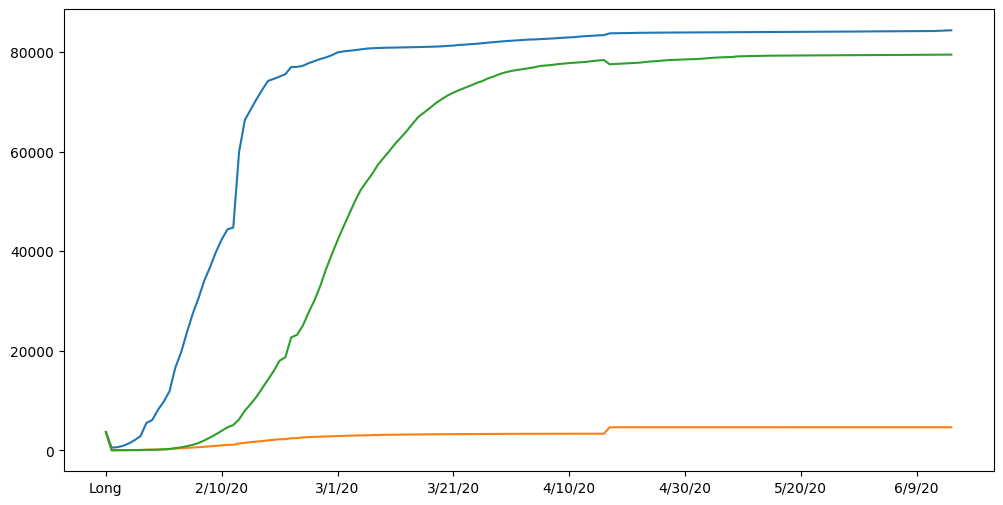

In [25]:
df_infected.loc['China'][2:].plot()
df_deaths.loc['China'][2:].plot()
df_recovered.loc['China'][2:].plot()
plt.show()

In [26]:
df_infected_=df_infected.drop(columns=['Lat', 'Long', 'Province/State'])

In [27]:
df_infected_.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,6/6/20,6/7/20,6/8/20,6/9/20,6/10/20,6/11/20,6/12/20,6/13/20,6/14/20,6/15/20
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,19551,20342,20917,21459,22142,22890,23546,24102,24766,25527
Albania,0,0,0,0,0,0,0,0,0,0,...,1232,1246,1263,1299,1341,1385,1416,1464,1521,1590
Algeria,0,0,0,0,0,0,0,0,0,0,...,10050,10154,10265,10382,10484,10589,10698,10810,10919,11031
Andorra,0,0,0,0,0,0,0,0,0,0,...,852,852,852,852,852,852,853,853,853,853
Angola,0,0,0,0,0,0,0,0,0,0,...,88,91,92,96,113,118,130,138,140,142


In [28]:
df_recovered = df_recovered.drop(columns=['Lat', 'Long', 'Province/State'])
df_deaths = df_deaths.drop(columns=['Lat', 'Long', 'Province/State'])

In [29]:
df_recovered.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,6/6/20,6/7/20,6/8/20,6/9/20,6/10/20,6/11/20,6/12/20,6/13/20,6/14/20,6/15/20
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,1830,1875,2171,2651,3013,3326,3928,4201,4725,5164
Albania,0,0,0,0,0,0,0,0,0,0,...,925,938,945,960,980,1001,1034,1039,1044,1055
Algeria,0,0,0,0,0,0,0,0,0,0,...,6631,6717,6799,6951,7074,7255,7322,7420,7606,7735
Andorra,0,0,0,0,0,0,0,0,0,0,...,741,744,751,757,759,780,781,781,781,789
Angola,0,0,0,0,0,0,0,0,0,0,...,24,24,38,38,40,41,42,61,61,64


In [30]:
df_deaths.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,6/6/20,6/7/20,6/8/20,6/9/20,6/10/20,6/11/20,6/12/20,6/13/20,6/14/20,6/15/20
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,327,357,369,384,405,426,446,451,471,478
Albania,0,0,0,0,0,0,0,0,0,0,...,34,34,34,34,34,35,36,36,36,36
Algeria,0,0,0,0,0,0,0,0,0,0,...,698,707,715,724,732,741,751,760,767,777
Andorra,0,0,0,0,0,0,0,0,0,0,...,51,51,51,51,51,51,51,51,51,51
Angola,0,0,0,0,0,0,0,0,0,0,...,4,4,4,4,4,5,5,6,6,6


In [31]:
def make_frame(country:str):
    """Take country name as parameter, return infected, recovered, deaths values as timeseries table.
    
    """

    df = pd.DataFrame({
        'infected' : df_infected_.loc[country],
        'recovered': df_recovered.loc[country],
        'deaths': df_deaths.loc[country]
    })
    df.index = pd.to_datetime(df.index)
    return df

In [32]:
df_us = make_frame('US')

C:\Users\tubaa\AppData\Local\Temp\ipykernel_20164\1032392707.py:11: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df.index = pd.to_datetime(df.index)


In [33]:
df_turkey = make_frame('Turkey')

C:\Users\tubaa\AppData\Local\Temp\ipykernel_20164\1032392707.py:11: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df.index = pd.to_datetime(df.index)


In [34]:
df_turkey

,infected,recovered,deaths
2020-01-22,0,0,0
2020-01-23,0,0,0
2020-01-24,0,0,0
2020-01-25,0,0,0
2020-01-26,0,0,0
...,...,...,...
2020-06-11,174023,147860,4763
2020-06-12,175218,149102,4778
2020-06-13,176677,150087,4792
2020-06-14,178239,151417,4807


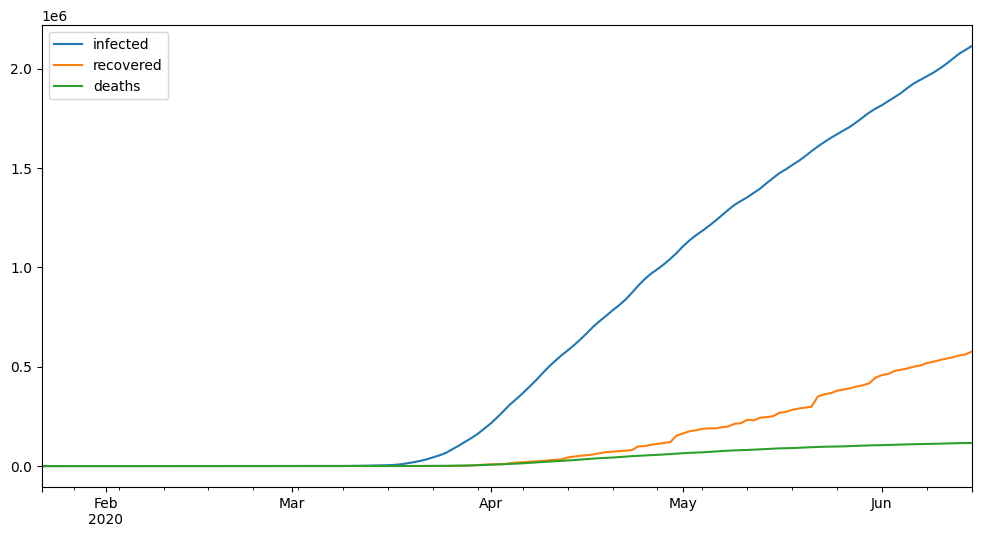

In [35]:
df_us.plot()
plt.show()

In [36]:
df_us['new_infected'] = df_us['infected'].diff()

In [37]:
df_us

,infected,recovered,deaths,new_infected
2020-01-22,1,0,0,NaN
2020-01-23,1,0,0,0.0
2020-01-24,2,0,0,1.0
2020-01-25,2,0,0,0.0
2020-01-26,5,0,0,3.0
...,...,...,...,...
2020-06-11,2023590,540292,113823,22888.0
2020-06-12,2048986,547386,114669,25396.0
2020-06-13,2074526,556606,115436,25540.0
2020-06-14,2094058,561816,115732,19532.0


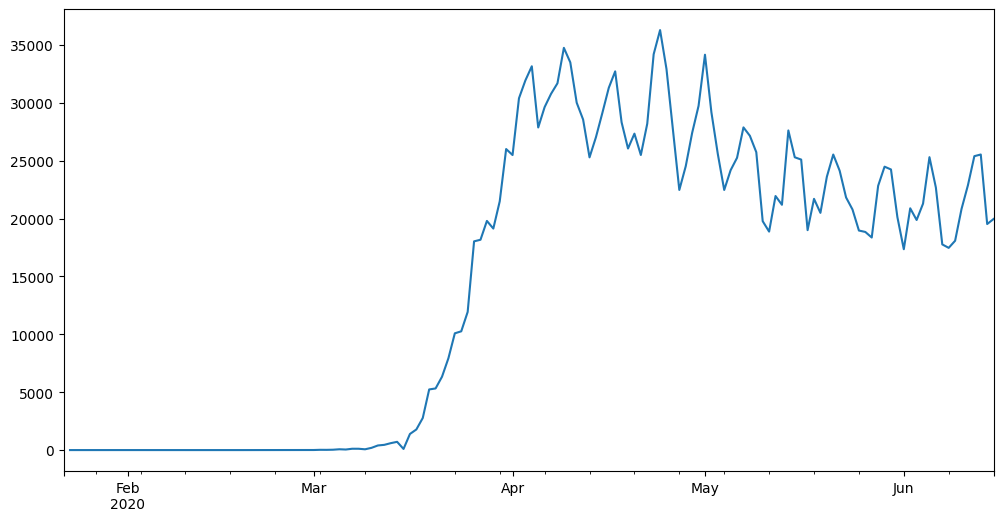

In [38]:
df_us['new_infected'].plot()
plt.show()

In [39]:
df_us['new_infected_avg'] = df_us['new_infected'].rolling(window=7).mean()

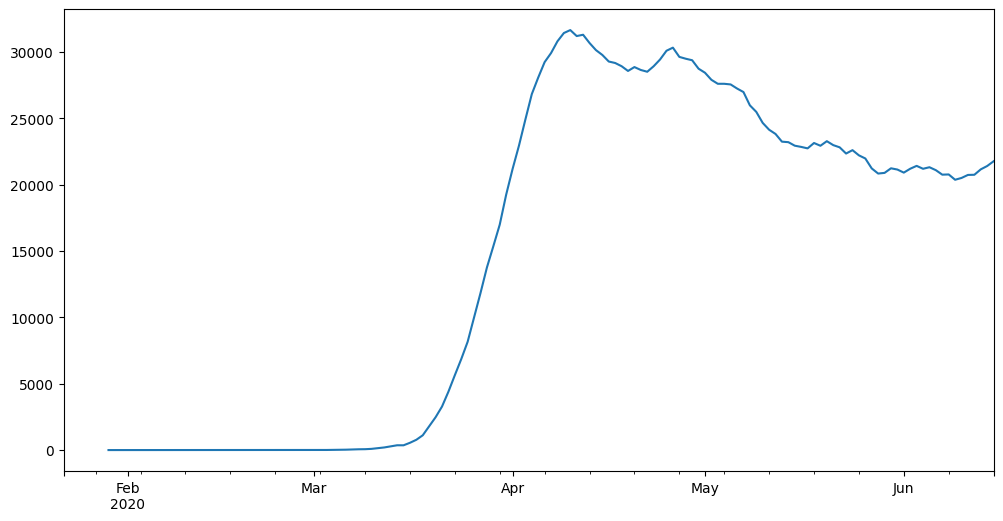

In [40]:
df_us['new_infected_avg'].plot()
plt.show()

In [41]:
countries.head()

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,Combined_Key,Population
0,4,AF,AFG,4.0,NaN,NaN,NaN,Afghanistan,33.93911,67.709953,Afghanistan,38928341.0
1,8,AL,ALB,8.0,NaN,NaN,NaN,Albania,41.15330,20.168300,Albania,2877800.0
2,12,DZ,DZA,12.0,NaN,NaN,NaN,Algeria,28.03390,1.659600,Algeria,43851043.0
3,20,AD,AND,20.0,NaN,NaN,NaN,Andorra,42.50630,1.521800,Andorra,77265.0
4,24,AO,AGO,24.0,NaN,NaN,NaN,Angola,-11.20270,17.873900,Angola,32866268.0


In [42]:
countries.shape

(4021, 12)

In [43]:
countries[countries['Country_Region'] == 'US']

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,Combined_Key,Population
697,840,US,USA,840.0,NaN,NaN,NaN,US,40.000000,-100.000000,US,329466283.0
698,16,AS,ASM,16.0,60.0,NaN,American Samoa,US,-14.271000,-170.132000,"American Samoa, US",55641.0
699,316,GU,GUM,316.0,66.0,NaN,Guam,US,13.444300,144.793700,"Guam, US",164229.0
700,580,MP,MNP,580.0,69.0,NaN,Northern Mariana Islands,US,15.097900,145.673900,"Northern Mariana Islands, US",55144.0
701,850,VI,VIR,850.0,78.0,NaN,Virgin Islands,US,18.335800,-64.896300,"Virgin Islands, US",107268.0
...,...,...,...,...,...,...,...,...,...,...,...,...
4016,84056037,US,USA,840.0,56037.0,Sweetwater,Wyoming,US,41.659439,-108.882788,"Sweetwater, Wyoming, US",42343.0
4017,84056039,US,USA,840.0,56039.0,Teton,Wyoming,US,43.935225,-110.589080,"Teton, Wyoming, US",23464.0
4018,84056041,US,USA,840.0,56041.0,Uinta,Wyoming,US,41.287818,-110.547578,"Uinta, Wyoming, US",20226.0
4019,84056043,US,USA,840.0,56043.0,Washakie,Wyoming,US,43.904516,-107.680187,"Washakie, Wyoming, US",7805.0


In [44]:
countries[(countries['Country_Region'] == 'US') & (countries['Province_State'].isna())]

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,Combined_Key,Population
697,840,US,USA,840.0,NaN,NaN,NaN,US,40.0,-100.0,US,329466283.0


In [45]:
countries[(countries['Country_Region'] == 'US') & (countries['Province_State'].isna())]['Population']

697    329466283.0
Name: Population, dtype: float64

In [46]:
pop_us = countries[(countries['Country_Region'] == 'US') & (countries['Province_State'].isna())]['Population'].iloc[0]


In [47]:
print(pop_us)

329466283.0


In [48]:
df_us.head(8)

,infected,recovered,deaths,new_infected,new_infected_avg
2020-01-22,1,0,0,NaN,NaN
2020-01-23,1,0,0,0.0,NaN
2020-01-24,2,0,0,1.0,NaN
2020-01-25,2,0,0,0.0,NaN
2020-01-26,5,0,0,3.0,NaN
2020-01-27,5,0,0,0.0,NaN
2020-01-28,5,0,0,0.0,NaN
2020-01-29,5,0,0,0.0,0.571429


In [49]:
df_us['pop_infected'] = df_us['infected'] * 100 / pop_us

In [50]:
df_us

,infected,recovered,deaths,new_infected,new_infected_avg,pop_infected
2020-01-22,1,0,0,NaN,NaN,3.035212e-07
2020-01-23,1,0,0,0.0,NaN,3.035212e-07
2020-01-24,2,0,0,1.0,NaN,6.070424e-07
2020-01-25,2,0,0,0.0,NaN,6.070424e-07
2020-01-26,5,0,0,3.0,NaN,1.517606e-06
...,...,...,...,...,...,...
2020-06-11,2023590,540292,113823,22888.0,20721.000000,6.142025e-01
2020-06-12,2048986,547386,114669,25396.0,20733.142857,6.219107e-01
2020-06-13,2074526,556606,115436,25540.0,21141.142857,6.296626e-01
2020-06-14,2094058,561816,115732,19532.0,21392.714286,6.355910e-01


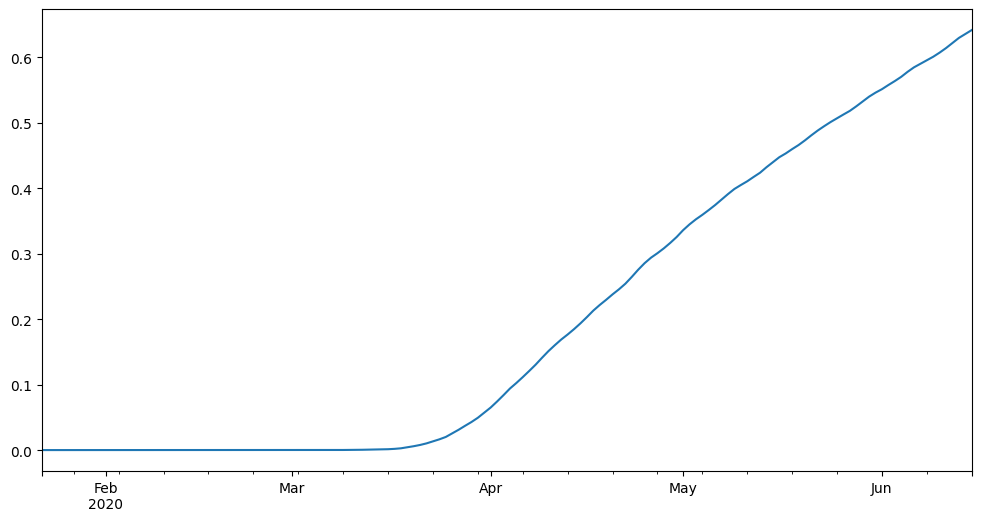

In [51]:
df_us['pop_infected'].plot()
plt.show()

In [52]:
# The basic reproduction number
df_us['Rt'] = df_us['new_infected'].rolling(8).apply(lambda x: x[4:].sum() / x[:4].sum())

In [53]:
df_us

,infected,recovered,deaths,new_infected,new_infected_avg,pop_infected,Rt
2020-01-22,1,0,0,NaN,NaN,3.035212e-07,NaN
2020-01-23,1,0,0,0.0,NaN,3.035212e-07,NaN
2020-01-24,2,0,0,1.0,NaN,6.070424e-07,NaN
2020-01-25,2,0,0,0.0,NaN,6.070424e-07,NaN
2020-01-26,5,0,0,3.0,NaN,1.517606e-06,NaN
...,...,...,...,...,...,...,...
2020-06-11,2023590,540292,113823,22888.0,20721.000000,6.142025e-01,0.910637
2020-06-12,2048986,547386,114669,25396.0,20733.142857,6.219107e-01,1.047659
2020-06-13,2074526,556606,115436,25540.0,21141.142857,6.296626e-01,1.245271
2020-06-14,2094058,561816,115732,19532.0,21392.714286,6.355910e-01,1.258778


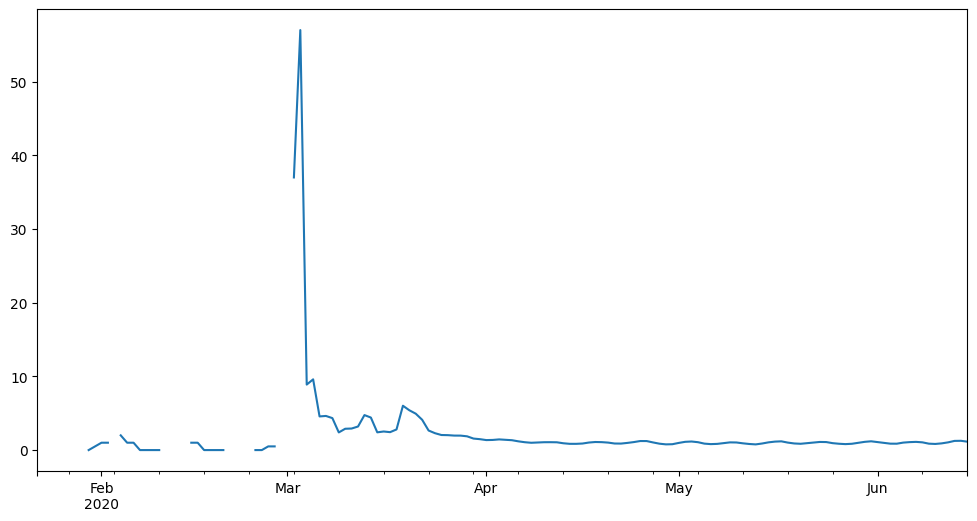

In [54]:
df_us['Rt'].plot()
plt.show()

In [55]:
# na ve inf değerler için neler yapılabilabilir:
# log değerler alınabilir
# virgülden sonra basamak sayısını azaltmak
# eksik verileri tamamlamak
# eksik veriyi doldurmak için pandas metodlarına bakmak

In [56]:
#inf değerlerin hangi şekilde değişeceğini method ile belirledik
#bfiil: bir sonraki değeri kullanacak

df_us['Rt'].replace(np.inf, np.nan).fillna(method='bfill')

C:\Users\tubaa\AppData\Local\Temp\ipykernel_20164\627525434.py:3: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_us['Rt'].replace(np.inf, np.nan).fillna(method='bfill')


2020-01-22    0.000000
2020-01-23    0.000000
2020-01-24    0.000000
2020-01-25    0.000000
2020-01-26    0.000000
                ...   
2020-06-11    0.910637
2020-06-12    1.047659
2020-06-13    1.245271
2020-06-14    1.258778
2020-06-15    1.140702
Name: Rt, Length: 146, dtype: float64

In [57]:
#ileride fillna da bulunan method bfill kaldırılacağı için kullanımı:
df_us['Rt'].replace(np.inf, np.nan).bfill()

2020-01-22    0.000000
2020-01-23    0.000000
2020-01-24    0.000000
2020-01-25    0.000000
2020-01-26    0.000000
                ...   
2020-06-11    0.910637
2020-06-12    1.047659
2020-06-13    1.245271
2020-06-14    1.258778
2020-06-15    1.140702
Name: Rt, Length: 146, dtype: float64

In [58]:
#grafikte 2020-05-01 den sora stabil olarak giden yeri almamak için
rt_array=df_us[df_us.index< '2020-05-01']['Rt'].replace(np.inf, np.nan).bfill()

In [59]:
print(rt_array)

2020-01-22    0.000000
2020-01-23    0.000000
2020-01-24    0.000000
2020-01-25    0.000000
2020-01-26    0.000000
                ...   
2020-04-26    1.224152
2020-04-27    1.035872
2020-04-28    0.866481
2020-04-29    0.775719
2020-04-30    0.794414
Name: Rt, Length: 100, dtype: float64


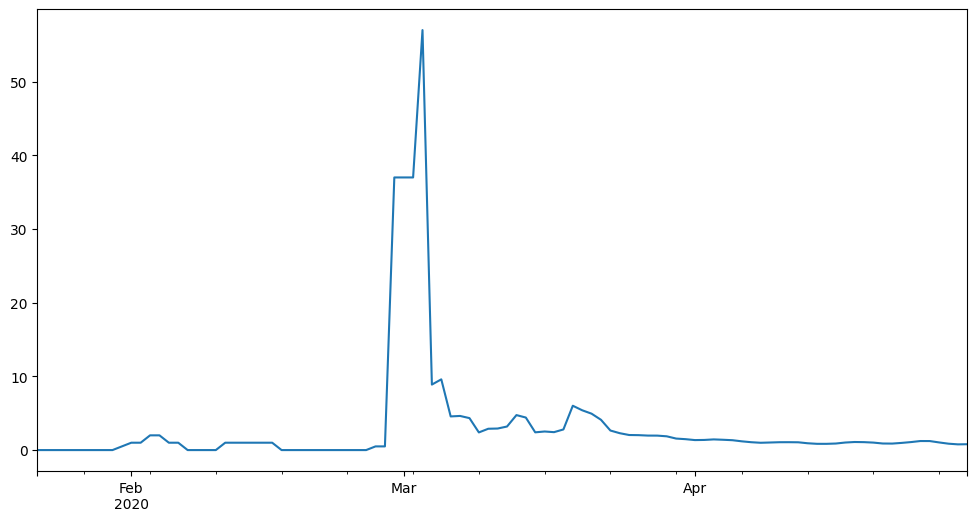

In [60]:
rt_array.plot()
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

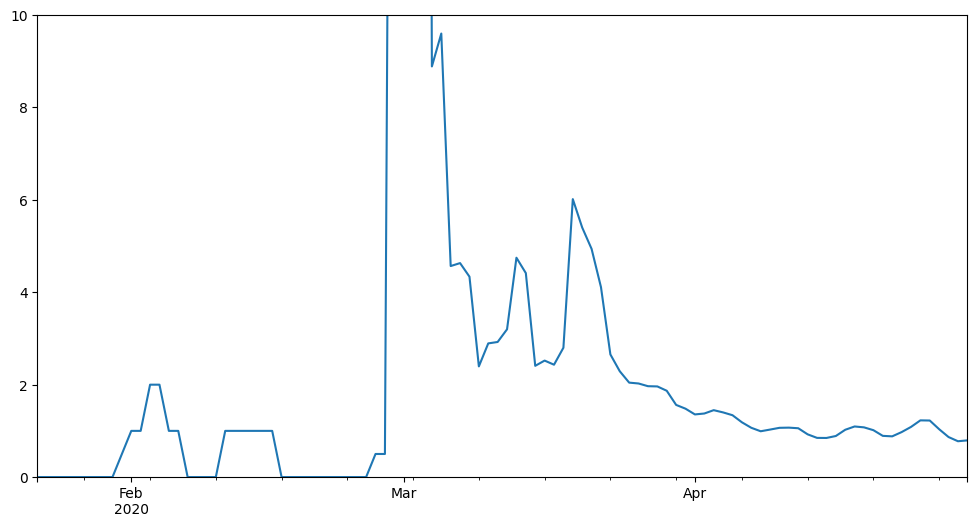

In [62]:
#değerleri belli bir aralıkta görmek için:
rt_array.plot()
plt.ylim([0,10])
plt.show

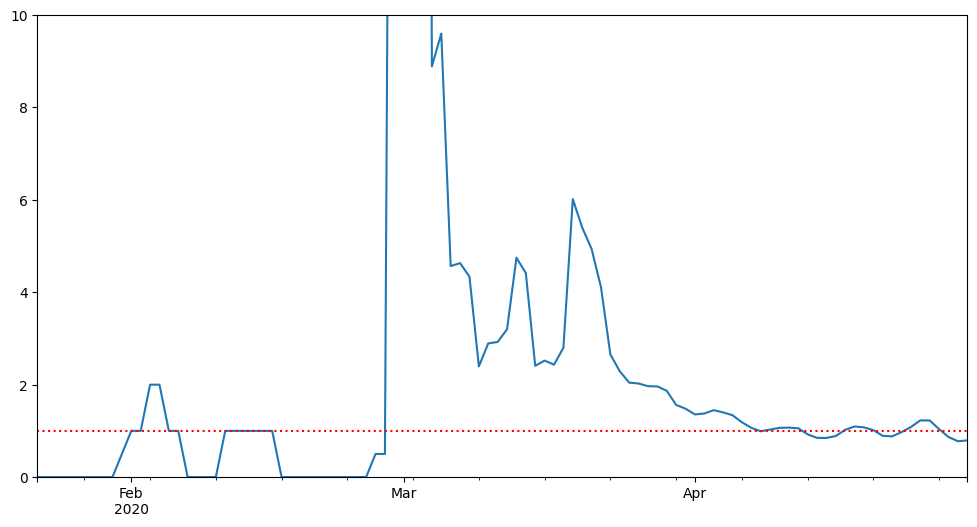

In [63]:
rt_array.plot()
plt.ylim([0,10])
plt.axhline(1,  color='red', linestyle='dotted')
plt.show()

In [64]:
df_us.head()

,infected,recovered,deaths,new_infected,new_infected_avg,pop_infected,Rt
2020-01-22,1,0,0,NaN,NaN,3.035212e-07,NaN
2020-01-23,1,0,0,0.0,NaN,3.035212e-07,NaN
2020-01-24,2,0,0,1.0,NaN,6.070424e-07,NaN
2020-01-25,2,0,0,0.0,NaN,6.070424e-07,NaN
2020-01-26,5,0,0,3.0,NaN,1.517606e-06,NaN


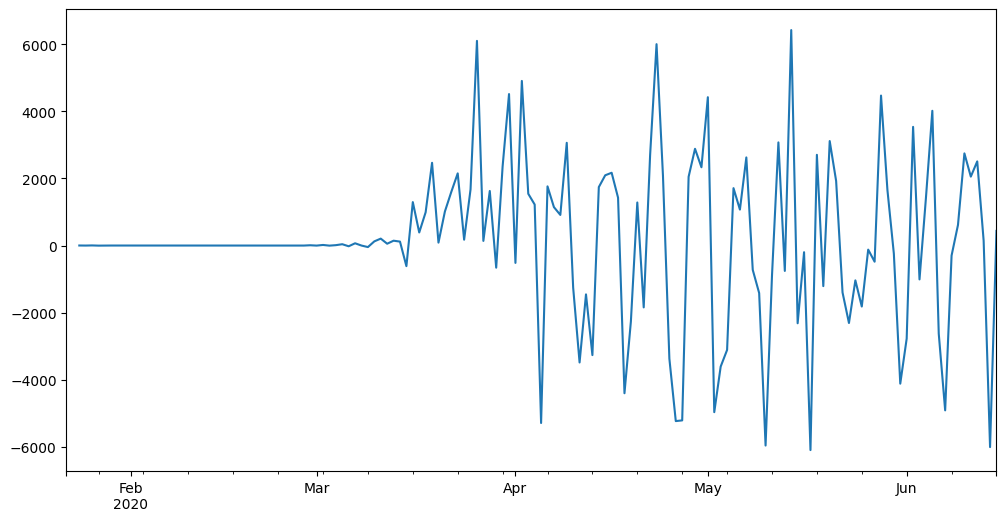

In [66]:
df_us['new_infected'].diff().plot()
plt.show()

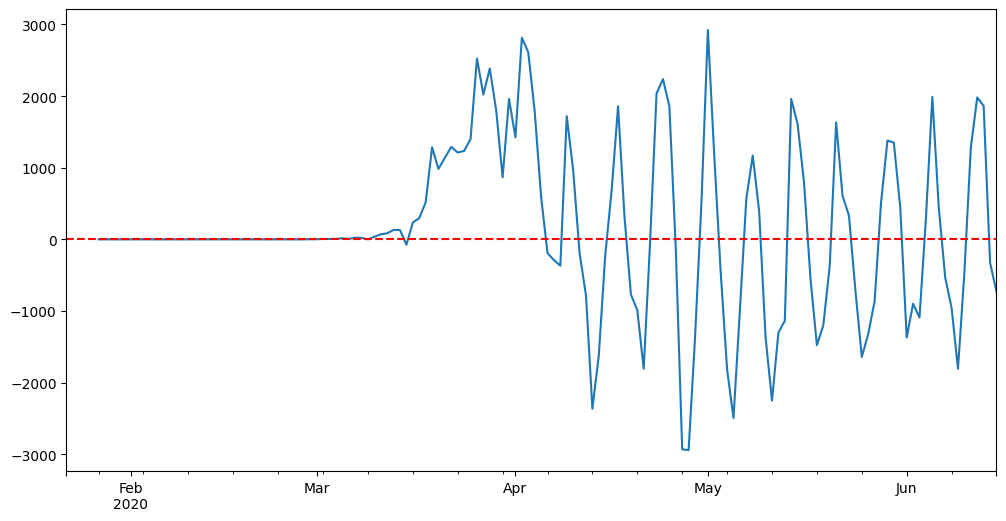

In [70]:
df_us['new_infected'].diff().rolling(4).mean().plot()
plt.axhline(0,  color='red', linestyle='dashed') #burada ortadaki veri 0 olduğu için 0 yazıldı
plt.show()

### TODOs:
- See the spread of pandemic in diffirent countries
- Plot Rt graphs in different countries side b side or in the same graph
- Check coreelation between deaths and recoveries.
- Compare recoveries between countries
- Are there any outliers(anomalies)?
